   Unnamed: 0  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0           1                 1                              0.766127   45   
1           2                 0                              0.957151   40   
2           3                 0                              0.658180   38   
3           4                 0                              0.233810   30   
4           5                 0                              0.907239   49   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
0                                     2   0.802982           9120   
1                                     0   0.121876           2600   
2                                     1   0.085113           3042   
3                                     0   0.036050           3300   
4                                     1   0.024926          63588   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                               13                   

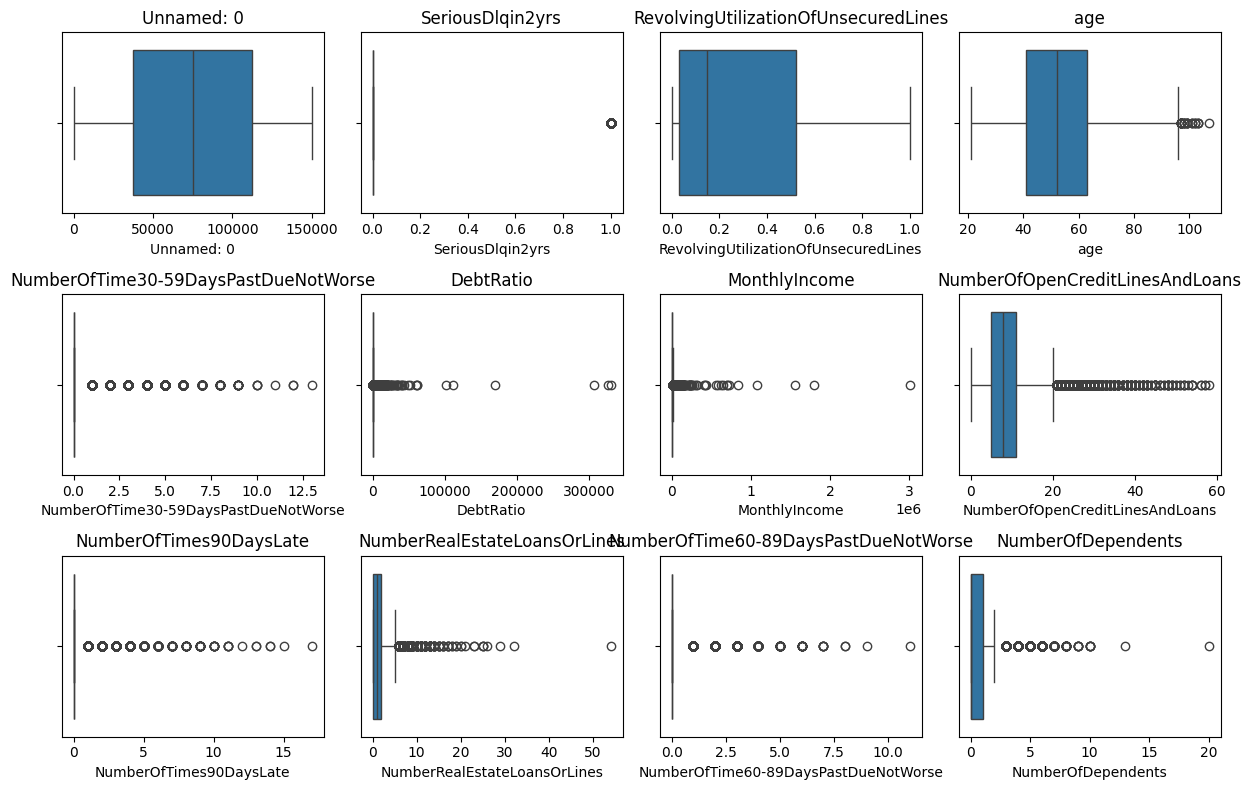

删除的重复行数: 3
训练数据形状: (61105, 10)
测试数据形状: (15277, 10)


In [1]:
import pandas as pd

# 加载数据
data = pd.read_csv('finance数据集.csv')

# 显示前五行的数据
print(data.head())

import matplotlib.pyplot as plt
import seaborn as sns

# 设置图像尺寸
plt.figure(figsize=(12, 8))

# 识别数值列用于箱线图
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

# 创建箱线图
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=data[col])
    plt.title(col)

plt.tight_layout()
plt.show()

# 使用IQR处理异常值
Q1 = data[numeric_cols].quantile(0.25)
Q3 = data[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# 移除异常值
data_cleaned = data[~((data[numeric_cols] < (Q1 - 1.5 * IQR)) | (data[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

#  数据清洗的时候：当data_cleaned出现后 就不要写data.
# 检查处理重复值
duplicates = data_cleaned.duplicated()
num_duplicates = duplicates.sum()
data_cleaned = data_cleaned[~duplicates]

print(f'删除的重复行数: {num_duplicates}')

#对数据进行归一化处理
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_cleaned[numeric_cols] = scaler.fit_transform(data_cleaned[numeric_cols])

# 设定目标变量
target_variable = 'SeriousDlqin2yrs'

from sklearn.model_selection import train_test_split

# 定义特征和目标
X = data_cleaned.drop(columns=['SeriousDlqin2yrs', 'Unnamed: 0'])   #1分
y = data_cleaned[target_variable]                         #1分

# 划分数据（训练集占80%）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 显示划分后的数据形状
print(f'训练数据形状: {X_train.shape}')
print(f'测试数据形状: {X_test.shape}')

# 保存清洗后的数据到CSV
cleaned_file_path = '2.1.3_cleaned_data.csv'
data_cleaned.to_csv(cleaned_file_path, index=False)
